2.18.0
Форма x_train: (60000, 28, 28)
Форма x_test : (10000, 28, 28)
Форма x_train після reshape: (60000, 784)
Форма x_test  після reshape: (10000, 784)
Форма y_train (one-hot): (60000, 10)
Форма y_test  (one-hot): (10000, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8822 - loss: 0.4148 - val_accuracy: 0.9662 - val_loss: 0.1146
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9686 - loss: 0.1029 - val_accuracy: 0.9677 - val_loss: 0.1017
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0721 - val_accuracy: 0.9716 - val_loss: 0.0907
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0514 - val_accuracy: 0.9760 - val_loss: 0.0784
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9869 - loss: 0.0420 - val_accuracy: 0.9737 - val_loss: 0.0877
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9752 - val_loss: 0.0850
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0248 - val_accuracy: 0.9781 - val_loss: 0.0876
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9923 - loss: 0.0221 - 

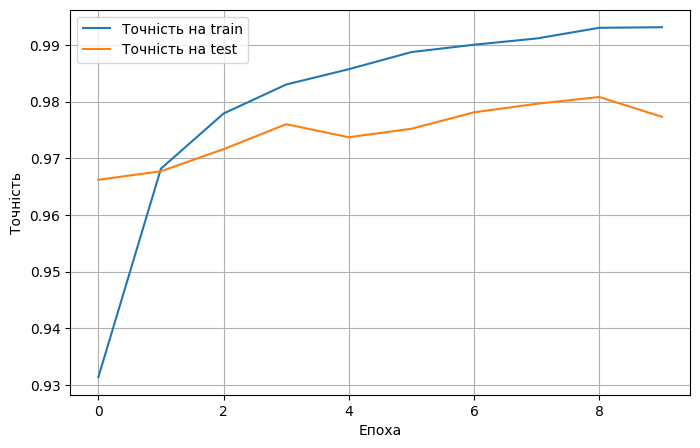

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


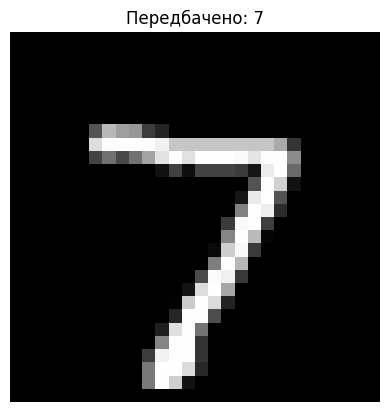

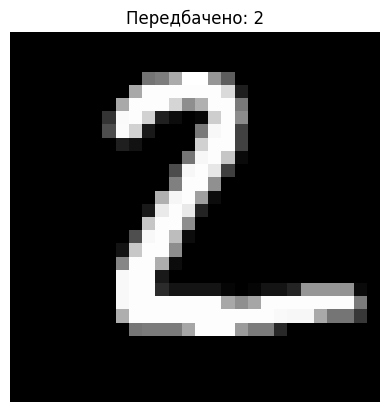

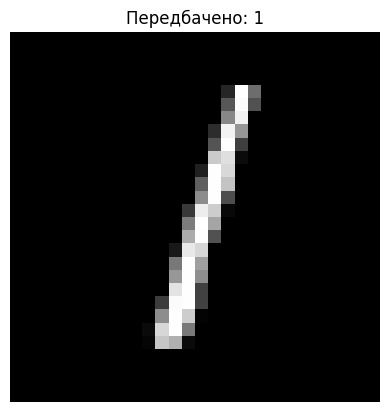

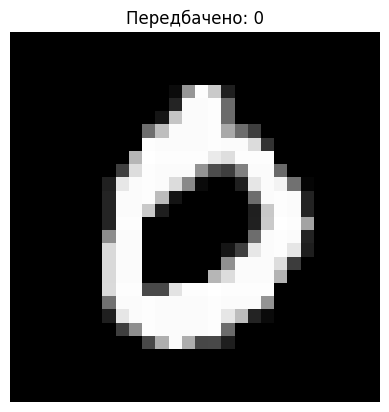

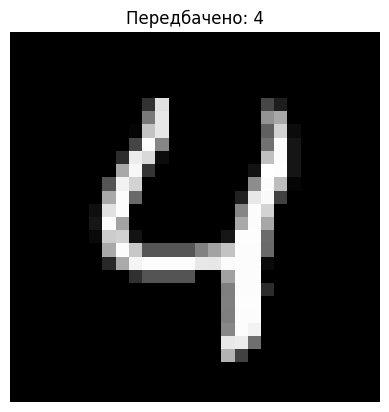

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Форма x_train:", x_train.shape)
print("Форма x_test :", x_test.shape)

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

print("Форма x_train після reshape:", x_train.shape)
print("Форма x_test  після reshape:", x_test.shape)

y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

print("Форма y_train (one-hot):", y_train.shape)
print("Форма y_test  (one-hot):", y_test.shape)

model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Точність на тестових даних: {accuracy * 100:.2f}%")
print(f"Втрати (loss) на тестових даних: {loss:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Точність на train")
plt.plot(history.history["val_accuracy"], label="Точність на test")
plt.xlabel("Епоха")
plt.ylabel("Точність")
plt.legend()
plt.grid(True)
plt.show()

predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Передбачено: {np.argmax(predictions[i])}")
    plt.axis("off")
    plt.show()
